#### Como Simular Aportes Recorrentes em Criptomoedas utilizando Python (O Poder dos Investimentos Fundamentalistas)

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = yf.Ticker('ETH-USD').history(period='1y', interval = '1mo')['Close']
usd = yf.Ticker('USDBRL=X').history(period='1y', interval = '1mo')['Close']
df = pd.DataFrame(df * usd)

In [63]:
df.head()

,Close
Date,
2021-03-01,11072.018027
2021-04-01,14798.942090
2021-05-01,14220.883319
2021-06-01,11270.610985
2021-07-01,13194.885949


In [64]:
df['Aporte'] = 1000
df.head()

,Close,Aporte
Date,,
2021-03-01,11072.018027,1000
2021-04-01,14798.942090,1000
2021-05-01,14220.883319,1000
2021-06-01,11270.610985,1000
2021-07-01,13194.885949,1000


In [65]:
for i in range(len(df)-1):
    pct_change_variable = df['Close'][df.index[i]:].pct_change() + 1
    df[f'investimento_{i}'] = pct_change_variable.cumprod() * df['Aporte']
    
investimento_colunas = [f'investimento_{i}' for i in range(len(df)-1)]

In [66]:
investimento_colunas

['investimento_0',
 'investimento_1',
 'investimento_2',
 'investimento_3',
 'investimento_4',
 'investimento_5',
 'investimento_6',
 'investimento_7',
 'investimento_8',
 'investimento_9',
 'investimento_10',
 'investimento_11']

In [67]:
df_resultado = df[investimento_colunas].transpose()
df_resultado.head()

Date,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-02-16
investimento_0,NaN,1336.607478,1284.398498,1017.936474,1191.732701,1607.357649,1467.843551,2181.871743,2342.800015,1852.688563,1302.035772,1497.457860,1455.689006
investimento_1,NaN,NaN,960.939183,761.582207,891.610081,1202.565208,1098.185949,1632.395284,1752.795831,1386.112672,974.134735,1120.342273,1089.092370
investimento_2,NaN,NaN,NaN,792.539446,927.852768,1251.447781,1142.825653,1698.749841,1824.044500,1442.456190,1013.731933,1165.882600,1133.362433
investimento_3,NaN,NaN,NaN,NaN,1170.733864,1579.035324,1441.979524,2143.426235,2301.518883,1820.043403,1279.093348,1471.072016,1430.039147
investimento_4,NaN,NaN,NaN,NaN,NaN,1348.756855,1231.688574,1830.839870,1965.877091,1554.617543,1092.556888,1256.538365,1221.489521


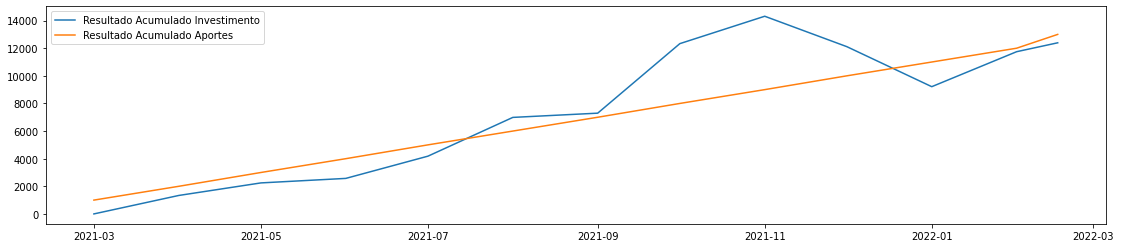

Valor final dos aportes: R$12000
Valor final do investimento: R$12391.39
Valor final do investimento: R$391.39


In [68]:
plt.figure(figsize = (19,4))
plt.plot(df_resultado.sum(), label = 'Resultado Acumulado Investimento')
plt.plot(df['Aporte'].cumsum(), label = 'Resultado Acumulado Aportes')
plt.legend()
plt.show()

valor_final_aportes = df['Aporte'].sum()
valor_final_invest = df_resultado.sum()[-1]

print(f'Valor final dos aportes: R${round(valor_final_aportes-1000, 2)}')
print(f'Valor final do investimento: R${round(valor_final_invest, 2)}')
print(f'Valor final do investimento: R${round(valor_final_invest-valor_final_aportes+1000, 2)}')

In [35]:
df_resultado.sum()[-1]

11535.109962706294